In [1]:
# Import numpy and matplotlib
from collections import namedtuple
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import simps

# Modify the style of the plots
plt.style.use('seaborn-whitegrid')

# Plot comparison of concentrations for Case 1

In [7]:
# Load particle data
HeA = np.load('../../data/Case1_HeA.npy')
HeB = np.load('../../data/Case1_HeB.npy')
CeA = np.load('../../data/Case1_CeA.npy')
CeB = np.load('../../data/Case1_CeB.npy')
MeA = np.load('../../data/Case1_MeA.npy')
MeB = np.load('../../data/Case1_MeB.npy')

In [8]:
# Numerical parameters for Eulerian solution
dt = 10    # Timestep
NJ = 4000  # Number of spatial grid cells
NK = 128   # Number of classes

# Load data, and work out grid parameters
CgA = np.load(f'../../data/Case1_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy').sum(axis = 2)
CgB = np.load(f'../../data/Case1_K_B_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy').sum(axis = 2)

In [11]:
# Meta-variables
Np = 100000
Tmax_part = 72*3600
Tmax_grid = 120*3600
Zmax = 50

# Number of grid cells and timesteps
Nz_grid, Nt_grid = CgA.shape
Nt_part, Nz_part = HeA.shape

# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
times_part = np.linspace(0, Tmax_part, Nt_part)

# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2

zc_part = np.linspace(0, Zmax, Nz_part + 1)
dz_part = zc_part[1] - zc_part[0]
mid_part = zc_part[:-1] + dz_part/2

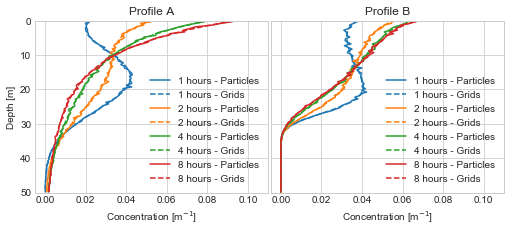

In [30]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for hours in [1, 2, 4, 8]:
    istart = np.argmin(np.abs(times_part - hours*3600))
    Navg   = 1 # Number of timesteps to average
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    lA, = ax[0].plot(np.mean(HeA[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{hours} hours - Particles')
    lB, = ax[1].plot(np.mean(HeB[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{hours} hours - Particles')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    ax[0].plot(CgA[:,it], mid_grid, '--', c = lA.get_color(), label = f'{hours} hours - Grids')
    ax[1].plot(CgB[:,it], mid_grid, '--', c = lB.get_color(), label = f'{hours} hours - Grids')

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

ax[0].legend(fontsize = 10, loc = 'lower right')
ax[1].legend(fontsize = 10, loc = 'lower right')

ax[0].set_xlim(-0.005, 0.11)
ax[1].set_xlim(-0.005, 0.11)

plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
#plt.savefig('concentration_profiles_comparison_case1.pdf')
#plt.savefig('concentration_profiles_comparison_case1.png', dpi = 240)

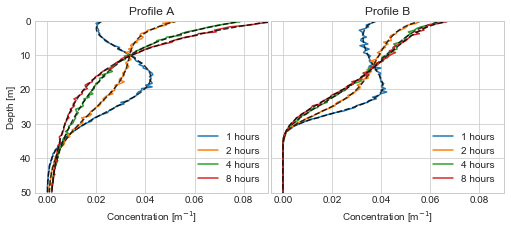

In [29]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for hours in [1, 2, 4, 8]:
    istart = np.argmin(np.abs(times_part - hours*3600))
    Navg   = 1 # Number of timesteps to average
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    lA, = ax[0].plot(np.mean(HeA[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{hours} hours')
    lB, = ax[1].plot(np.mean(HeB[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{hours} hours')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    ax[0].plot(CgA[:,it], mid_grid, '--', c = 'k', alpha = 0.8, lw = 1.5)
    ax[1].plot(CgB[:,it], mid_grid, '--', c = 'k', alpha = 0.8, lw = 1.5)

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

ax[0].legend(fontsize = 10, loc = 'lower right')
ax[1].legend(fontsize = 10, loc = 'lower right')

ax[0].set_xlim(-0.005, 0.09)
ax[1].set_xlim(-0.005, 0.09)

plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
plt.savefig('concentration_profiles_comparison_case1.pdf')
#plt.savefig('concentration_profiles_comparison_case1.png', dpi = 240)